<a href="https://colab.research.google.com/github/rgnemasters/Kaggle-Submissions/blob/main/Neural_Network_Model_Kaggle_RyanM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [265]:
df_test = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')
df_train = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')

In [208]:
pd.options.display.max_columns = None
print(df_test.info())
df_test.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
785,2246,20,RL,NaN,17979,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,6,1968,1968,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,785.0,Unf,0.0,328.0,1113.0,GasA,Ex,Y,SBrkr,1160,0,0,1160,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Attchd,1968.0,Unf,1.0,257.0,TA,TA,Y,81,0,0,0,0,0,NaN,GdWo,Shed,500,2,2008,WD,Normal
523,1984,160,RL,36.0,2448,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,Twnhs,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,Wd Shng,Stone,106.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,764.0,764.0,GasA,Ex,Y,SBrkr,764,862,0,1626,0.0,0.0,2,1,2,1,Gd,6,Typ,0,NaN,BuiltIn,2003.0,RFn,2.0,474.0,TA,TA,Y,0,27,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
431,1892,20,RL,64.0,6410,Pave,NaN,Reg,HLS,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,332.0,Rec,243.0,301.0,876.0,GasA,TA,Y,FuseA,876,0,0,876,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1959.0,Unf,1.0,320.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal
1328,2789,75,RM,70.0,6300,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Unf,7,6,1910,2005,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1226.0,1226.0,GasA,Ex,Y,SBrkr,1226,878,0,2104,0.0,0.0,2,0,5,1,TA,9,Typ,0,NaN,Detchd,1910.0,Unf,2.0,432.0,Fa,TA,P,0,341,88,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
343,1804,90,RL,75.0,8604,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,SFoyer,5,7,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,124.0,TA,Gd,CBlock,Gd,TA,Av,GLQ,941.0,Unf,0.0,0.0,941.0,GasA,Gd,Y,SBrkr,941,0,0,941,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,Attchd,1978.0,Unf,2.0,564.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
812,2273,20,RL,79.0,11850,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1984,1984,Gable,CompShg,Plywood,Plywood,BrkFace,98.0,TA,TA,CBlock,Gd,TA,No,ALQ,781.0,Unf,0.0,372.0,1153.0,GasA,TA,Y,SBrkr,1177,0,0,1177,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1984.0,Fin,2.0,495.0,TA,TA,Y,204,103,0,0,0,0,NaN,MnPrv,NaN,0,8,2007,WD,Normal
1132,2593,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132,0,0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial
877,2338,20,RL,91.0,11830,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,164.0,Gd,TA,PConc,Gd,TA,No,GLQ,1220.0,Unf,0.0,322.0,1542.0,GasA,Ex,Y,SBrkr,1542,0,0,1542,1.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,Unf,3.0,852.0,TA,TA,Y,168,110,0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial
676,2137,20,RL,82.0,9488,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,6,1947,1993,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1046.0,1046.0,GasA,Gd,N,SBrkr,1054,0,0,1054,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1947.0,Unf,1.0,240.0,TA,TA,Y,0,60,122,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Abnorml
323,1784,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4

In [209]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#Explore and Clean Data

In [210]:
for i in df_train.columns:
  print('\n')
  print('***'*20)
  print(i)
  print(df_train[i].dtype)
  print('***'*20)
  print('\n')
  print(df_train[i].isna().sum())



************************************************************
Id
int64
************************************************************


0


************************************************************
MSSubClass
int64
************************************************************


0


************************************************************
MSZoning
object
************************************************************


0


************************************************************
LotFrontage
float64
************************************************************


259


************************************************************
LotArea
int64
************************************************************


0


************************************************************
Street
object
************************************************************


0


************************************************************
Alley
object
************************************************************


1

In [211]:
null_list = df_train[['LotFrontage', 'Alley','MasVnrType', 'MasVnrArea', 'BsmtQual',
                      'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2', 'Electrical','FireplaceQu',
                      'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond','PoolQC','Fence',
                      'MiscFeature']]
for col in null_list.columns:
  print(col)
  print(df_train[col].value_counts(dropna=False))

LotFrontage
NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
38.0       1
33.0       1
150.0      1
46.0       1
Name: LotFrontage, Length: 111, dtype: int64
Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64
MasVnrArea
0.0      861
NaN        8
72.0       8
108.0      8
180.0      8
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 328, dtype: int64
BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64
BsmtCond
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64
BsmtExposure
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

I will drop any columns that are far greater than half null values, since the sample size of homes that include these is too small to make a meaningful difference in a predictive model.

In [212]:
#Review columns that cannot be simple-imputed
df_train.drop(columns=['Alley', 'FireplaceQu', 'PoolQC', 'MiscFeature', 'Fence'], inplace=True)

The above categories did not conform to the null patterns in other columns, which is why I have decided to manually impute for them. The other columns can easily be imputed in transformer pipelines.

#EDA and Feature Engineering

In [213]:
first_slice = df_train[df_train.columns[1:48]]
second_slice = df_train[df_train.columns[48:]]
first_slice['SalePrice'] = df_train['SalePrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


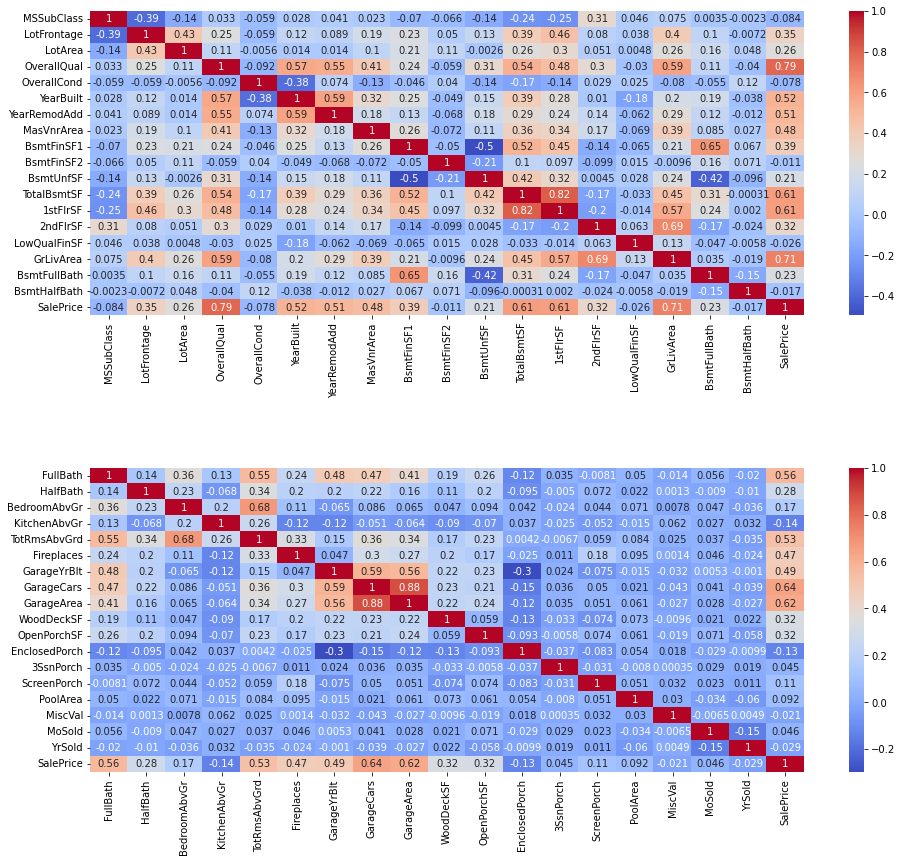

In [214]:
fig, ax = plt.subplots(nrows = 2, figsize = (16,14))
sns.heatmap(first_slice.corr(), cmap = 'coolwarm', annot=True, ax = ax[0])
sns.heatmap(second_slice.corr(), cmap = 'coolwarm', annot=True, ax = ax[1])
plt.subplots_adjust(hspace = .5)

I will select features from the above that highly correlate with 'SalePrice,' our target. For some of these correlated features, I believe it is more important to know if they *have* the feature, rather than the size (WoodDeck, OpenPorch, Fireplaces) so I will engineer features for these qualities.

In [215]:
#Review data for columns that indicate whether houses have a deck, porch, fireplace, or pool
df_train[['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fireplaces']].head(10)

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fireplaces
0,0,61,0,0,0,0,0
1,298,0,0,0,0,0,1
2,0,42,0,0,0,0,1
3,0,35,272,0,0,0,1
4,192,84,0,0,0,0,1
5,40,30,0,320,0,0,0
6,255,57,0,0,0,0,1
7,235,204,228,0,0,0,2
8,90,0,205,0,0,0,2
9,0,4,0,0,0,0,2


In [216]:
#Engineer boolean features for these columns, except for Fireplaces (since this is not in sq.ft. format)
df_train['HasDeck'] = df_train['WoodDeckSF'] > 0
df_train['HasDeck'].value_counts()

False    761
True     699
Name: HasDeck, dtype: int64

In [217]:
df_train['HasPorch'] = df_train['OpenPorchSF'] + df_train['EnclosedPorch'] + df_train['3SsnPorch'] + df_train['ScreenPorch'] > 0
df_train['HasPorch'].value_counts()

True     1002
False     458
Name: HasPorch, dtype: int64

In [218]:
df_train['HasPool'] = df_train['PoolArea'] > 0
df_train['HasPool'].value_counts()

False    1453
True        7
Name: HasPool, dtype: int64

In [219]:
#Dropping 'HasPool,' as the sample size of Trues is not large enough
df_train.drop(columns='HasPool', inplace=True)

In [220]:
#Pare down features to highly correlated, and to object categories related to quality of location
df_train = df_train[['Neighborhood', 'HouseStyle', 'MSZoning', 'TotRmsAbvGrd','1stFlrSF',
                     '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'YearBuilt', 'OverallQual', 'FullBath', 'GarageArea',
                    'HasDeck', 'HasPorch', 'SalePrice']]

In [221]:
print(df_train.info())
df_train.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Neighborhood  1460 non-null   object
 1   HouseStyle    1460 non-null   object
 2   MSZoning      1460 non-null   object
 3   TotRmsAbvGrd  1460 non-null   int64 
 4   1stFlrSF      1460 non-null   int64 
 5   2ndFlrSF      1460 non-null   int64 
 6   TotalBsmtSF   1460 non-null   int64 
 7   GrLivArea     1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   OverallQual   1460 non-null   int64 
 10  FullBath      1460 non-null   int64 
 11  GarageArea    1460 non-null   int64 
 12  HasDeck       1460 non-null   bool  
 13  HasPorch      1460 non-null   bool  
 14  SalePrice     1460 non-null   int64 
dtypes: bool(2), int64(10), object(3)
memory usage: 151.3+ KB
None


Neighborhood    0
HouseStyle      0
MSZoning        0
TotRmsAbvGrd    0
1stFlrSF        0
2ndFlrSF        0
TotalBsmtSF     0
GrLivArea       0
YearBuilt       0
OverallQual     0
FullBath        0
GarageArea      0
HasDeck         0
HasPorch        0
SalePrice       0
dtype: int64

#Data Validation Split

In [222]:
#Split training data
y = df_train['SalePrice']
X = df_train.drop(columns=['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#Instantiate Transformers

In [223]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
scaler = StandardScaler()

num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

med_imputer = SimpleImputer(strategy='median')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [224]:
#Build transformer pipelines
num_pipe = make_pipeline(med_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

#Test and Tune Model

##Gradient Boosting Model

In [237]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
lgbm = LGBMRegressor()
lgbm_pipe = make_pipeline(transformer, lgbm)

In [231]:
lgbm_params = {'lgbmregressor__num_leaves': range(15, 51, 5),
               'lgbmregressor__boosting_type': ['gbdt', 'dart'],
               'lgbmregressor__class_weight': [None, 'balanced']}

In [234]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(lgbm_pipe, lgbm_params, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print(grid.best_params_)

ypred_train = grid.predict(X_train)
ypred_test = grid.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, ypred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, ypred_test))

print(f'Score on the training set: {rmse_train}')
print(f'Score on the testing set: {rmse_test}')

Fitting 3 folds for each of 32 candidates, totalling 96 fits
{'lgbmregressor__boosting_type': 'gbdt', 'lgbmregressor__class_weight': None, 'lgbmregressor__num_leaves': 20}
Score on the training set: 19066.56601740575
Score on the testing set: 30913.934927054477


In [235]:
lgbm_model = LGBMRegressor(num_leaves=20)
lgbm_pipe = make_pipeline(transformer, lgbm_model)

In [238]:
lgbm_pipe.fit(X_train, y_train)
ypred_train = grid.predict(X_train)
ypred_test = grid.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, ypred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, ypred_test))
r2_train = r2_score(y_train, ypred_train)
r2_test = r2_score(y_test, ypred_test)

print(f'R2 score on training set: {r2_train}')
print(f'R2 score on testing set: {r2_test}')
print(f'Score on the training set: {rmse_train}')
print(f'Score on the testing set: {rmse_test}')

R2 score on training set: 0.9401239850029579
R2 score on testing set: 0.8635789848050992
Score on the training set: 19066.56601740575
Score on the testing set: 30913.934927054477


##Deep Learning Model

In [239]:
#Transform data to prep for Deep Learning modelling
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [240]:
#Begin building Keras model
input_shape = X_train.shape[1]
model = Sequential()

In [241]:
input_shape

49

In [242]:
#Add model's layers
model.add(Dense(30, input_dim=input_shape, activation='relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

In [245]:
model.compile(optimizer='adam', loss='mse')
early_stopping = EarlyStopping(patience=5)
first_model = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=100, callbacks=early_stopping)

Epoch 1/100
35/35 [==============================] - 2s 18ms/step - loss: 39090556928.0000 - val_loss: 38884122624.0000
Epoch 2/100
35/35 [==============================] - 0s 8ms/step - loss: 39089827840.0000 - val_loss: 38883053568.0000
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 39088152576.0000 - val_loss: 38880534528.0000
Epoch 4/100
35/35 [==============================] - 0s 8ms/step - loss: 39084146688.0000 - val_loss: 38874636288.0000
Epoch 5/100
35/35 [==============================] - 0s 7ms/step - loss: 39075291136.0000 - val_loss: 38861508608.0000
Epoch 6/100
35/35 [==============================] - 0s 9ms/step - loss: 39055818752.0000 - val_loss: 38835142656.0000
Epoch 7/100
35/35 [==============================] - 0s 7ms/step - loss: 39018225664.0000 - val_loss: 38786326528.0000
Epoch 8/100
35/35 [==============================] - 0s 8ms/step - loss: 38953365504.0000 - val_loss: 38707281920.0000
Epoch 9/100
35/35 [============================

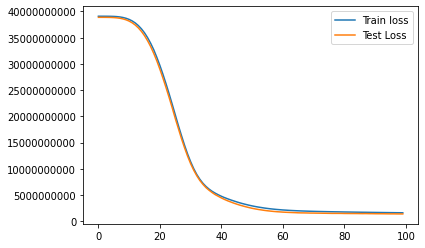

In [246]:
# Visualize the loss
plt.plot(first_model.history['loss'], label='Train loss')
plt.plot(first_model.history['val_loss'], label='Test Loss')
plt.ticklabel_format(style='plain')
plt.legend();

In [247]:
def model_eval(model=model):
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)

  train_score = np.sqrt(mean_squared_error(y_train, train_preds))
  test_score = np.sqrt(mean_squared_error(y_test, test_preds))

  print(f'The training set RMSE is {train_score}')
  print(f'The testing set RMSE is {train_score}')

In [248]:
model_eval()

The training set RMSE is 40224.18742026694
The testing set RMSE is 40224.18742026694


#Creating Predictions on the Test Data

In [267]:
#Repeat feature engineering process in test data to mirror Training DF
df_test['HasDeck'] = df_test['WoodDeckSF'] > 0
df_test['HasDeck'].value_counts()

False    762
True     697
Name: HasDeck, dtype: int64

In [268]:
df_test['HasPorch'] = df_test['OpenPorchSF'] + df_test['EnclosedPorch'] + df_test['3SsnPorch'] + df_test['ScreenPorch'] > 0
df_test['HasPorch'].value_counts()

True     1044
False     415
Name: HasPorch, dtype: int64

In [269]:
df_test = df_test[['Id', 'Neighborhood', 'HouseStyle', 'MSZoning', 'TotRmsAbvGrd','1stFlrSF',
                     '2ndFlrSF', 'TotalBsmtSF', 'GrLivArea', 'YearBuilt', 'OverallQual', 'FullBath', 'GarageArea',
                    'HasDeck', 'HasPorch']]

In [270]:
df_test.isna().sum()

Id              0
Neighborhood    0
HouseStyle      0
MSZoning        4
TotRmsAbvGrd    0
1stFlrSF        0
2ndFlrSF        0
TotalBsmtSF     1
GrLivArea       0
YearBuilt       0
OverallQual     0
FullBath        0
GarageArea      1
HasDeck         0
HasPorch        0
dtype: int64

In [271]:
#Review null values to take proper cleaning steps
df_test['MSZoning'].value_counts(dropna=False)

RL         1114
RM          242
FV           74
C (all)      15
RH           10
NaN           4
Name: MSZoning, dtype: int64

In [272]:
df_test['MSZoning'] = df_test['MSZoning'].fillna('RL')
df_test['MSZoning'].value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


RL         1118
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [273]:
#For float values, impute mean for nulls
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(df_test['TotalBsmtSF'].mean())
df_test['GarageArea'] = df_test['GarageArea'].fillna(df_test['GarageArea'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [274]:
df_test.isna().sum()

Id              0
Neighborhood    0
HouseStyle      0
MSZoning        0
TotRmsAbvGrd    0
1stFlrSF        0
2ndFlrSF        0
TotalBsmtSF     0
GrLivArea       0
YearBuilt       0
OverallQual     0
FullBath        0
GarageArea      0
HasDeck         0
HasPorch        0
dtype: int64

In [275]:
#Run predictions for both models on testing set
df_test_lgbm = df_test
df_test_lgbm['SalePrice'] = lgbm_pipe.predict(df_test_lgbm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [301]:
df_test_lgbm = df_test_lgbm[['Id', 'SalePrice']]
df_test_lgbm.set_index('Id', inplace=True)

In [302]:
df_test_lgbm.to_csv(path_or_buf='/content/drive/MyDrive/Kaggle Submissions/RyanM_submission1.csv')

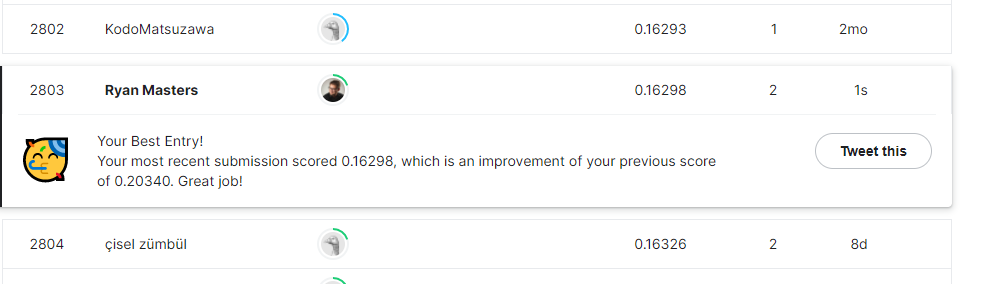

In [305]:
from IPython.display import Image
Image('/content/drive/MyDrive/Kaggle Submissions/kaggle_gradient_results.PNG')

In [289]:
df_test_deep = df_test.drop(columns='Id')

In [290]:
df_test_deep = transformer.transform(df_test_deep)

In [291]:
preds = model.predict(df_test_deep)

In [292]:
df_test_deep = pd.DataFrame(df_test_deep)

In [295]:
df_test_deep['Id'] = df_test['Id']
df_test_deep['SalePrice'] = preds

In [299]:
df_test_deep = df_test_deep[['Id', 'SalePrice']]
df_test_deep.set_index('Id', inplace=True)
df_test_deep

,SalePrice
Id,
1461,155289.921875
1462,194362.171875
1463,188081.093750
1464,203228.125000
1465,207960.250000
...,...
2915,48817.589844
2916,77223.085938
2917,148632.718750


In [300]:
df_test_deep.to_csv(path_or_buf='/content/drive/MyDrive/Kaggle Submissions/RyanMsubmission2.csv')

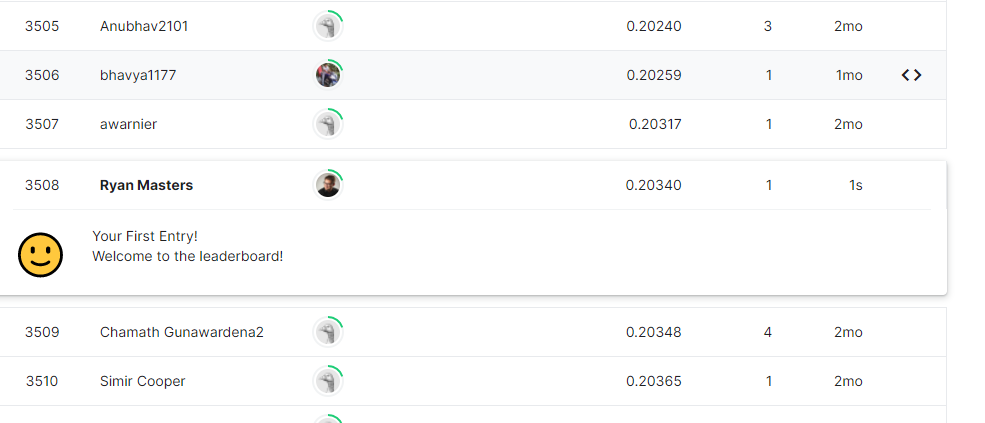

In [304]:
from IPython.display import Image
Image('/content/drive/MyDrive/Kaggle Submissions/kaggle_deep_results.PNG')